## Intermediate Pandas



Today we look at some ways to use Pandas DataFrames like databases.



### Revisiting a previous example with batches of data



We start with the example we looked at before. It is a dataset from a set of experiments. The experiments are grouped by the Day they were run on. We will use Pandas to do some analysis by the day.



In [1]:
fname = '04-p-t.dat'
url = 'https://www.itl.nist.gov/div898/handbook/datasets/MODEL-4_4_4.DAT'

import urllib.request
urllib.request.urlretrieve(url, fname)

import pandas as pd
df = pd.read_csv('03-p-t.dat', delimiter='\s+', skiprows=2,
                 names=['Run order', 'Day', 'Ambient Temperature', 'Temperature',
                        'Pressure', 'Fitted Value', 'Residual'])
df

# Out [68]:
# text/plain
    Run order  Day  Ambient Temperature  Temperature  Pressure  Fitted Value  \
0           1    1               23.820       54.749   225.066       222.920
1           2    1               24.120       23.323   100.331        99.411
2           3    1               23.434       58.775   230.863       238.744
3           4    1               23.993       25.854   106.160       109.359
4           5    1               23.375       68.297   277.502       276.165
5           6    1               23.233       37.481   148.314       155.056
6           7    1               24.162       49.542   197.562       202.456
7           8    1               23.667       34.101   138.537       141.770
8           9    1               24.056       33.901   137.969       140.983
9          10    1               22.786       29.242   117.410       122.674
10         11    2               23.785       39.506   164.442       163.013
11         12    2               22.987       43

The first aggregation we will look at is how to make groups of data that are related by values in a column.  We use the `groupby` function ([https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby)), and specify a column to group on. The result is a `DataFrameGroupBy` object, which we next have to work with.



In [1]:
groups = df.groupby('Day')
type(groups)

# Out [69]:
# text/plain
pandas.core.groupby.generic.DataFrameGroupBy

The groups can describe themselves. Here we see we get 4 groups, one for each day, and you can see some statistics about each group. We do not need those for now.



In [1]:
groups.describe()

# Out [70]:
# text/plain
    Run order                                                 \
        count  mean      std   min    25%   50%    75%   max
Day
1        10.0   5.5  3.02765   1.0   3.25   5.5   7.75  10.0
2        10.0  15.5  3.02765  11.0  13.25  15.5  17.75  20.0
3        10.0  25.5  3.02765  21.0  23.25  25.5  27.75  30.0
4        10.0  35.5  3.02765  31.0  33.25  35.5  37.75  40.0
:
    Ambient Temperature           ... Fitted Value          Residual          \
                  count     mean  ...          75%      max    count    mean
Day                               ...
1                  10.0  23.6646  ...    217.80400  276.165     10.0 -2.9823
2                  10.0  23.7758  ...    244.69725  278.040     10.0  2.6827
3                  10.0  24.2883  ...    205.81225  225.282     10.0 -0.6690
4                  10.0  23.5207  ...    206.10075  231.697     10.0  0.9687
:
:
          std    min      25%     50%      75%    max
Day
1    3.452383 -7.881 -5.17100 -3.21

We can get a dictionary of the group names and labels from the groups attribute.



In [1]:
groups.groups

# Out [72]:
# text/plain
{1: Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64'),
 2: Int64Index([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64'),
 3: Int64Index([20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype='int64'),
 4: Int64Index([30, 31, 32, 33, 34, 35, 36, 37, 38, 39], dtype='int64')}

We can get the subset of rows from those group labels.



In [1]:
df.loc[groups.groups[2]]

# Out [76]:
# text/plain
    Run order  Day  Ambient Temperature  Temperature  Pressure  Fitted Value  \
10         11    2               23.785       39.506   164.442       163.013
11         12    2               22.987       43.004   181.044       176.759
12         13    2               23.799       53.226   222.179       216.933
13         14    2               23.661       54.467   227.010       221.813
14         15    2               23.852       57.549   232.496       233.925
15         16    2               23.379       61.204   253.557       248.288
16         17    2               24.146       31.489   139.894       131.506
17         18    2               24.187       68.476   273.931       276.871
18         19    2               24.159       51.144   207.969       208.753
19         20    2               23.803       68.774   280.205       278.040
:
    Residual
10     1.429
11     4.285
12     5.246
13     5.198
14    -1.429
15     5.269
16     8.388
17    -2.940
18    

We don't usually work with groups that way though, it is more common to do some analysis on each group.

Suppose we want to plot the Pressure vs Temperature for each group, so we can see visually if there are any trends that could be attributed to the group. To do this, we need to *iterate* over the groups and then make a plot on each one.

A `DataFrameGroupBy` is *iterable* and when you loop over it, you get the `key` it was grouped on, and a DataFrame that contains the items in the group. Here we loop over each group, and plot each group with a different color.



# Out [28]:
# text/plain
Text(0, 0.5, 'Pressure')

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

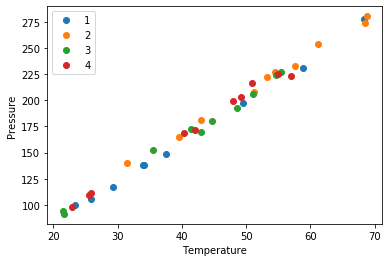

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for (day, group) in groups:
    group.plot('Temperature', 'Pressure', ax=ax, label=f'{day}', style='o')
plt.ylabel('Pressure')

the point of this is we cannot see a visual clustering of the groups by day. That is important, because if we did it could suggest something was different that day.



### Combining data sets



Siddhant Lambor provided from two experiments conducted to measure the properties of a worm-like micelles solution. He had carried out experiments on a rheometer to measure the viscosity of a worm-like micelles solution in a Couette cell geometry and a Cone and Plate geometry. Ideally, there should not be a difference as viscosity is intrinsic to the fluid. Analysis of this data will confirm if that is true. First, we read this data in from the two data files.



In [1]:
url = 'https://drive.google.com/uc?id=1PaBg_dpK2_Ot8yvJr5Lwsa8e_3H9OErH'

import urllib.request
urllib.request.urlretrieve(url, 'couette.xls')

# Out [202]:
# text/plain
('couette.xls', <http.client.HTTPMessage at 0x128f1cd90>)

In [1]:
couette = pd.read_excel('couette.xls',
                   sheet_name='Flow sweep - 1',
                   header=1) # sheet name is case sensitive, excel file name is not

couette

We can drop the row at index 0, it just has the units in it. With this syntax, we have to save the resulting DataFrame back into the variable, or it will not be changed.



In [1]:
couette = couette.drop(0)
couette

Now get the second file.



In [1]:
url = 'https://drive.google.com/uc?id=1XtGJ-PStHNO5mqlSuFFkPEf2cQYlLie_'

import urllib.request
urllib.request.urlretrieve(url, 'cp.xls')

# Out [203]:
# text/plain
('cp.xls', <http.client.HTTPMessage at 0x128f34950>)

Here, we combine the drop function all into one line.



In [1]:
conePlate = pd.read_excel('cp.xls', sheet_name='Flow sweep - 1', header=1).drop(0)
conePlate.head(5)

For this analysis, we are only interested in the shear rate, stress and viscosity values. Let us drop the other columns. We do that by the names, and specify inplace=True, which modifies the DataFrame itself.



In [1]:
conePlate.drop(['Temperature', 'Step time', 'Normal stress'], axis=1, inplace=True)
# if we do not use inplace=True, the data frame will not be changed. It would by default create a new data frame
# and we would have to assign a different variable to capture this change.
conePlate.head(5)

We also do that for the couette data. Here we did not use `inplace=True`, so we have to save the result back into the variable to get the change.



In [1]:
couette = couette.drop(['Temperature', 'Step time', 'Normal stress'], axis=1)   # without using inplace = True
couette.head(5)

We can see info about each DataFrame like this.



In [1]:
couette.info()

In [1]:
conePlate.info()

We could proceed to analyze the DataFrames separately, but instead, we will combine them into one DataFrame. Before doing that, we need to add a column to each one so we know which data set is which. Simply assigning a value to a new column name will do that.



In [1]:
couette['type'] = 'couette'
couette

In [1]:
conePlate['type'] = 'cone'

Now, we can combine these into a single DataFrame. This is not critical, and you can get by without it, but I want to explore the idea, and illustrate it is possible.



In [1]:
df = pd.concat([conePlate, couette])
df

Finally, we are ready for the visualization. We will group the DataFrame and then make plots for each group. Here we illustrate several new arguments, including loglog plots, secondary axes, colored tick labels, and multiple legends.



In [1]:
g = df.groupby('type')
ax1 = g.get_group('cone').plot('Shear rate', 'Viscosity',
                               logx=True, logy=True, style='b.-',
                               label="CP viscosity")

g.get_group('couette').plot('Shear rate', 'Viscosity', logx=True, logy=True,
                            style='g.-', ax=ax1, label="Couette viscosity")

ax2 = g.get_group('cone').plot('Shear rate', 'Stress', secondary_y=True,
                               logx=True, logy=True, style='r.-',
                               ax=ax1, label="CP stress")

g.get_group('couette').plot('Shear rate', 'Stress', secondary_y=True,
                            logx=True, logy = True, style='y.', ax=ax2,
                            label="Couette Stress")

# Setting y axis labels
ax1.set_ylabel("Viscosity (Pa.s)", color='b')
[ticklabel.set_color('b') for ticklabel in ax1.get_yticklabels()]

ax2.set_ylabel("Stress (Pa)", color='r')
[ticklabel.set_color('r') for ticklabel in ax1.get_yticklabels()]

# setting legend locations
ax1.legend(loc=6)
ax2.legend(loc=7)

ax1.set_xlabel("Shear rate (1/s)")
plt.title("Comparison of Cone and Plate with Couette Cell")

So, in fact we can see these two experiments are practically equivalent.



### Monitoring Covid cases as a function of time



This [site](https://www.tableau.com/covid-19-coronavirus-data-resources) provides COVID data for all the countries in the world as a function of time.

[https://docs.google.com/spreadsheets/d/14quQPFErG-hlpsrNgYcX85vW7JMMK5X2vNZrafRcH8c/edit#gid=1592210746](https://docs.google.com/spreadsheets/d/14quQPFErG-hlpsrNgYcX85vW7JMMK5X2vNZrafRcH8c/edit#gid=1592210746)

We are going to use this data set to illustrate several concepts in data analysis.

[https://www.tableau.com/about/blog/2020/3/ten-considerations-you-create-another-chart-about-covid-19](https://www.tableau.com/about/blog/2020/3/ten-considerations-you-create-another-chart-about-covid-19)

`read_csv` is flexible enough to directly read the data from a URL that exports the google sheet as CSV data. The only new wrinkle here is we tell it some column names that should be parsed as dates.



In [1]:
import pandas as pd


url = 'https://docs.google.com/spreadsheets/d/14quQPFErG-hlpsrNgYcX85vW7JMMK5X2vNZrafRcH8c/export?format=csv&id=14quQPFErG-hlpsrNgYcX85vW7JMMK5X2vNZrafRcH8c'

df = pd.read_csv(url, parse_dates=['Date', 'Prep_Flow_Runtime'])
df

# Out [78]:
# text/plain
       Case_Type  Cases  Difference       Date Country_Region Province_State  \
0         Deaths    0.0         0.0 2020-02-27        Bahamas            NaN
1      Confirmed   16.0         0.0 2020-02-16        Germany            NaN
2         Deaths    0.0         0.0 2020-01-31         Canada        Alberta
3         Deaths    0.0         0.0 2020-03-04      Australia     Queensland
4      Confirmed    0.0         0.0 2020-01-25       Suriname            NaN
...          ...    ...         ...        ...            ...            ...
85013     Deaths    1.0         NaN 2020-03-23             US       Maryland
85014     Deaths    0.0         NaN 2020-03-23             US         Oregon
85015  Confirmed    6.0         NaN 2020-03-23             US  Massachusetts
85016  Confirmed    0.0         NaN 2020-03-23             US         Kansas
85017     Deaths    0.0         NaN 2020-03-23             US       Nebraska
:
           Admin2                  Combined_Ke

Let's get the data out of this for Pennsylvania. The first step is not hard, we just select the rows for Pennsylvania.



In [1]:
df[df['Province_State'] == 'Pennsylvania']

# Out [79]:
# text/plain
       Case_Type  Cases  Difference       Date Country_Region Province_State  \
33278     Deaths    0.0         0.0 2020-01-28             US   Pennsylvania
33426  Confirmed    7.0         1.0 2020-03-09             US   Pennsylvania
33552     Deaths    0.0         0.0 2020-02-07             US   Pennsylvania
33621  Confirmed    0.0         0.0 2020-02-25             US   Pennsylvania
33624  Confirmed    0.0         0.0 2020-02-07             US   Pennsylvania
...          ...    ...         ...        ...            ...            ...
84583     Deaths    0.0         NaN 2020-03-23             US   Pennsylvania
84775  Confirmed    3.0         NaN 2020-03-23             US   Pennsylvania
84910     Deaths    0.0         NaN 2020-03-23             US   Pennsylvania
84949  Confirmed   23.0         NaN 2020-03-23             US   Pennsylvania
85000  Confirmed    1.0         NaN 2020-03-23             US   Pennsylvania
:
            Admin2                   Combined_

    d1 =  df[(df['Province_State'] == 'Pennsylvania') & (df['Table_Names'] == 'Time Series') & (df['Case_Type'] == 'Confirmed')]['Date']
    len(d1), len(d1.unique())

    (61, 61)



In [1]:
d1 =  df[(df['Province_State'] == 'Pennsylvania') & (df['Table_Names'] == 'Time Series') & (df['Case_Type'] == 'Confirmed')]['Date']
len(d1), len(d1.unique())

    (61, 61)

:results:

Let's now group these by the Case\_Type. This will split the selected rows into two groups, one for `Confirmed` and one for `Deaths`. Then we can plot these by getting each group, which returns a DataFrame. Here we string together several commands so we get the group and plot in a single line.



In [1]:
d1 =  df[(df['Province_State'] == 'Pennsylvania') & (df['Table_Names'] == 'Time Series')]
g1 = d1.groupby('Case_Type')

ax = g1.get_group('Confirmed').plot(x='Date', y='Cases', label='Confirmed')
g1.get_group('Deaths').plot(x='Date', y='Cases', ax=ax, label='Deaths')

    <Figure size 432x288 with 1 Axes>

![img](obipy-resources/3be45d76b163b8bb1df66eecadee508f4a67987e/15ff592b3b38c32b4dce3add72442da79e4f3c92.png)

:results:

To see how this compares to the `Daily Summary` we need to take several steps. Let's narrow down these into independent cells so we can easily follow what is happening. Later we will combine this into a more compact syntax.



In [1]:
g1 = df.groupby('Province_State')

PA = g1.get_group('Pennsylvania')
PA

:results:

Next, we get the group for the Daily Summary.



In [1]:
ds = PA.groupby('Table_Names').get_group('Daily Summary')
ds

           Case_Type  Cases  Difference       Date Country_Region Province_State  \
    36623     Deaths    NaN         3.0 2020-03-23             US   Pennsylvania
    38135  Confirmed    NaN       189.0 2020-03-23             US   Pennsylvania
    41376  Confirmed    1.0         1.0 2020-03-26             US   Pennsylvania
    41377  Confirmed    1.0         0.0 2020-03-29             US   Pennsylvania
    41378  Confirmed    1.0         0.0 2020-03-28             US   Pennsylvania
    ...          ...    ...         ...        ...            ...            ...
    84583     Deaths    0.0         NaN 2020-03-23             US   Pennsylvania
    84775  Confirmed    3.0         NaN 2020-03-23             US   Pennsylvania
    84910     Deaths    0.0         NaN 2020-03-23             US   Pennsylvania
    84949  Confirmed   23.0         NaN 2020-03-23             US   Pennsylvania
    85000  Confirmed    1.0         NaN 2020-03-23             US   Pennsylvania
    
                Admin2                   Combined_Key     FIPS        Lat  \
    36623          NaN                            NaN      NaN  39.907800
    38135          NaN                            NaN      NaN  39.907800
    41376  Susquehanna  Susquehanna, Pennsylvania, US  42115.0  41.821478
    41377  Susquehanna  Susquehanna, Pennsylvania, US  42115.0  41.821478
    41378  Susquehanna  Susquehanna, Pennsylvania, US  42115.0  41.821478
    ...            ...                            ...      ...        ...
    84583      Clarion      Clarion, Pennsylvania, US  42031.0  41.192658
    84775       Centre       Centre, Pennsylvania, US  42027.0  40.920589
    84910        Blair        Blair, Pennsylvania, US  42013.0  40.479614
    84949  Northampton  Northampton, Pennsylvania, US  42095.0  40.751827
    85000      Fayette      Fayette, Pennsylvania, US  42051.0  39.920410
    
                Long Prep_Flow_Runtime    Table_Names
    36623 -77.209800        2020-03-29  Daily Summary
    38135 -77.209800        2020-03-29  Daily Summary
    41376 -75.800720        2020-03-29  Daily Summary
    41377 -75.800720        2020-03-29  Daily Summary
    41378 -75.800720        2020-03-29  Daily Summary
    ...          ...               ...            ...
    84583 -79.424135        2020-03-29  Daily Summary
    84775 -77.822006        2020-03-29  Daily Summary
    84910 -78.349174        2020-03-29  Daily Summary
    84949 -75.304718        2020-03-29  Daily Summary
    85000 -79.642912        2020-03-29  Daily Summary
    
    [940 rows x 13 columns]

Now, we need to group this by case type and date, then we sum up each group. This will make two groups containing the aggregated sum by date of each case type.



In [1]:
d = ds.groupby(['Case_Type', 'Date']).sum()
d

# Out [127]:
# text/plain
                       Cases  Difference       FIPS         Lat         Long
Case_Type Date
Confirmed 2020-03-23   698.0       189.0  2818489.0  2774.71905 -5277.436095
          2020-03-24   946.0       248.0  2818489.0  2734.81125 -5200.226295
          2020-03-25  1260.0       314.0  2818489.0  2734.81125 -5200.226295
          2020-03-26  1795.0       535.0  2818489.0  2734.81125 -5200.226295
          2020-03-27  2345.0       550.0  2818489.0  2734.81125 -5200.226295
          2020-03-28  2845.0       500.0  2818489.0  2734.81125 -5200.226295
          2020-03-29  3432.0       587.0  2818489.0  2734.81125 -5200.226295
Deaths    2020-03-23     6.0         3.0  2818489.0  2774.71905 -5277.436095
          2020-03-24     8.0         2.0  2818489.0  2734.81125 -5200.226295
          2020-03-25    15.0         7.0  2818489.0  2734.81125 -5200.226295
          2020-03-26    18.0         3.0  2818489.0  2734.81125 -5200.226295
          2020-03-27    22.0       

Finally, we can plot these results. To access the two case types, we note that Case\_Type is the index in this new DataFrame, so we can use `loc` to get each one.



# Out [134]:


# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

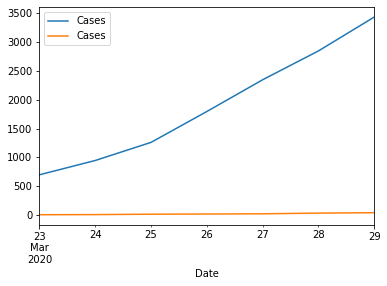

In [1]:
ax = d.loc['Confirmed'].plot(y='Cases')
d.loc['Deaths'].plot(y='Cases', ax=ax)

:results:

So we can see over the past 5 days, the number of cases is growing fast. We can pretty easily combine these to see the longitudinal trend over time.



In [1]:
g2 = df.groupby(['Province_State', 'Table_Names', 'Case_Type', 'Date'])
df2 = g2.sum()
ax = df2.loc[('Pennsylvania', 'Daily Summary', 'Confirmed')].plot(y='Cases', label='Confirmed DS')
df2.loc[('Pennsylvania', 'Daily Summary', 'Deaths')].plot(y='Cases', ax=ax, label='Deaths DS')

df2.loc[('Pennsylvania', 'Time Series', 'Confirmed')].plot(y='Cases', ax=ax, label='Confirmed')
df2.loc[('Pennsylvania', 'Time Series', 'Deaths')].plot(y='Cases', ax=ax, label='Deaths')

    <Figure size 432x288 with 1 Axes>

![img](obipy-resources/3be45d76b163b8bb1df66eecadee508f4a67987e/82fa9703537f9604a15bc1d94225af36053c949d.png)

:results:

You can see the cases are growing fast.

**Exercise**

1.  Perform this analysis for another State
2.  Perform this analysis for a country

